In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from collections import Counter

In [2]:
games19 = pd.read_csv("mlb_data/2019_games.csv")
atbats19 = pd.read_csv("mlb_data/2019_atbats.csv")
pitches19 = pd.read_csv("mlb_data/2019_pitches.csv")
players = pd.read_csv("mlb_data/player_names.csv")

In [3]:
def batter(last_name, first_name):
    batter = pd.DataFrame()
    batter = players.loc[(players['last_name'] == last_name) & (players['first_name'] == first_name)]
    batter = batter.reset_index(drop = True)
    return batter

In [15]:
batter('kershaw', 'clayton')

,id,first_name,last_name


In [4]:
def pitchers_faced(last_name, first_name):
    batter_id = batter(last_name, first_name)
    player_at_bats = pd.DataFrame()
    player_at_bats = atbats19.loc[(atbats19['batter_id'] == batter_id['id'][0])]
    player_at_bats = player_at_bats.reset_index(drop = True)
    return player_at_bats

In [5]:
def game_summary(last_name, first_name):
    player_at_bats = pitchers_faced(last_name, first_name)
    player_game_summary = player_at_bats.copy()
    player_game_summary = player_game_summary.drop_duplicates(subset=['g_id'])
    player_game_summary = player_game_summary.reset_index(drop = True)
    return player_game_summary

In [6]:
def pitches_faced(last_name, first_name):
    count = 0
    count2 = 0
    player_at_bats = pitchers_faced(last_name, first_name)
    at_bat_stats = pd.DataFrame()
    while count2 < len(pitches19)-1:
        if (count>len(player_at_bats)-1):
            break
        pitch = pitches19['ab_id'][count2]
        bat = player_at_bats['ab_id'][count]
        if (pitch == bat ):
            at_bat_stats = at_bat_stats.append(pitches19.loc[count2])
        if(pitch>bat):
            count+=1
            count2-=1
        count2 +=1
    at_bat_stats = at_bat_stats.reset_index(drop = True)
    return at_bat_stats

In [7]:
def total_pitches(last_name, first_name):
    at_bat_stats = pitches_faced(last_name, first_name)
    total_pitches = Counter(at_bat_stats['pitch_type']).most_common()
    return total_pitches

In [8]:
def pitch_type_breakdown(last_name, first_name):
    total_pitches1 = total_pitches(last_name, first_name)
    at_bat_stats1 = pitches_faced(last_name, first_name)
    pitch_type = []*len(total_pitches1)
    for x in range(len(total_pitches1)):
        if type(total_pitches1[x][0]) == str:
            pitch_type.append([total_pitches1[x][0]])
    for x in range(len(total_pitches1)):
        for k in range(len(at_bat_stats1)):
            location = []
            if (total_pitches1[x][0] == at_bat_stats1['pitch_type'][k]):
                location.append(at_bat_stats1['px'][k])
                location.append(at_bat_stats1['pz'][k])
                location.append(at_bat_stats1['code'][k])
                pitch_type[x].append(location)
    return pitch_type

In [9]:
def balls_and_strikes(last_name, first_name):
    stats= pitch_type_breakdown(last_name, first_name)
    color = []
    for x in range(len(stats)):
        long = stats[x][:]
        counter = 1
        while counter < len(long):
            if stats[x][counter][2] == ('B') or stats[x][counter][2] == ('*B') or stats[x][counter][2] == ('H') or stats[x][counter][2] == ('I'):
                stats[x][counter][2] = 'b'
            else:
                stats[x][counter][2] = 'r'
            counter+=1
    return stats

In [10]:
def strikezone_map(last_name, first_name):
    pitch_type = balls_and_strikes(last_name, first_name)
    for x in range(len(pitch_type)):
        test = pitch_type[x][:]
        test.pop([0][0])
        xs = [test[x][0] for x in range(len(test))]
        ys = [test[x][1] for x in range(len(test))]
        color = [test[x][2] for x in range(len(test))]
        plt.scatter(xs,ys, c=color)
        currentAxis = plt.gca()
#         currentAxis.add_patch(Rectangle((-0.8, 1.59), 1.6, 2.15, fill=None, alpha=1)) # Strike Zone
        plt.title(pitch_type[x][0])
    plt.title("Pitch Placement")
    plt.show()   

# each pitch type mapped out
def pitch_breakdown(last_name, first_name):
    pitch_type = balls_and_strikes(last_name, first_name)
    for x in range(len(pitch_type)):
        test = pitch_type[x][:]
        test.pop([0][0])
        xs = [test[x][0] for x in range(len(test))]
        ys = [test[x][1] for x in range(len(test))]
        color = [test[x][2] for x in range(len(test))]
        plt.scatter(xs,ys, c=color)
        currentAxis = plt.gca()
#         currentAxis.add_patch(Rectangle((-0.8, 1.59), 1.6, 2.15, fill=None, alpha=1)) # Strike Zone
        plt.title(pitch_type[x][0])
        plt.show()

In [13]:
def main(last_name, first_name):
    strikezone_map(last_name, first_name)
    pitch_breakdown(last_name, first_name)

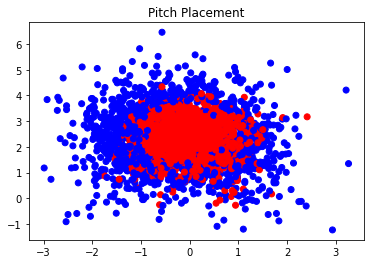

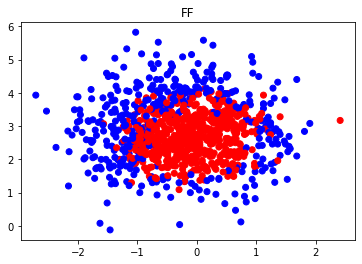

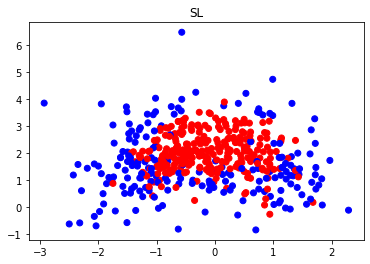

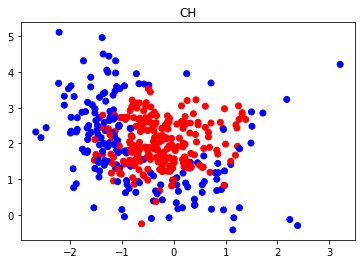

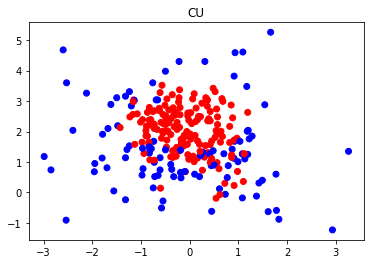

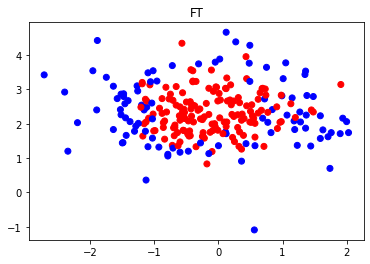

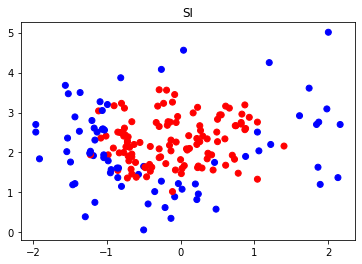

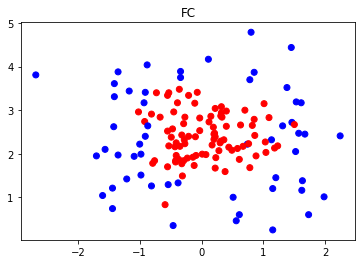

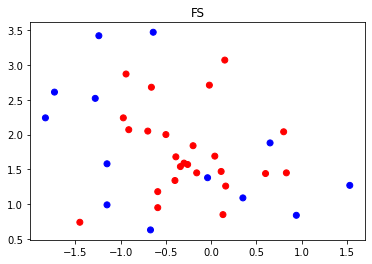

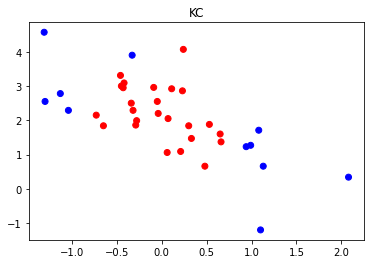

In [14]:
main('Harper', 'Bryce')